# Measure Mueller Matrix with Camera

## Preparation

Start by loading the required modules

In [1]:
%load_ext autoreload
%autoreload 2  

In [2]:
import numpy as np
import datetime
import cv2
from PIL import Image
from py_lab.setups.polarimeter import Polarimeter, degrees
from py_lab.config import CONF_POLARIMETER
from py_lab.camera import Camera
from py_pol.mueller import Mueller, degrees, create_Mueller, Stokes

number of processors: 4
total memory        : 7.9 Gb
available memory    : 57 %
max frequency       : 3401 GHz


## Folder to save data

In [3]:
%cd D:\Experimentos\Medidas_2D

D:\Experimentos\Medidas_2D


## Initialize Polarimeter Object

Use_daca as false to measure with the camera, even though we use Reference PHD

In [4]:
pol = Polarimeter(use_daca=False)

Background cleared


In [5]:
pol.Open()

DLL loaded succesfully!
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

DLL loaded succesfully!
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

DLL loaded succesfully!
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

DLL loaded succesfully!
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

Background cleared
Background cleared
Background cleared
Property uEye cannot be automatically handled by Resolution
uEye camera can't set the resolution. Use Set_ROI method instead.
Background cleared


### Check Motor

In [6]:
pol.motor.Move_Absolute(pos=360*np.ones(4, dtype=float), move_time=5, units="deg")

array([360., 360., 360., 360.])

In [7]:
pol.motor.Move_Absolute(pos=1)

array([0.994, 0.994, 0.994, 0.994])

In [6]:
pol.motor.Home()

## Photodiode and Camera Background

In [7]:
pol.camera.Start_Live(view=True)

We have to measure and record the signal measured by the photodetector and camera with the diode offline. The experiment should be as covered as possible to avoid light from unknown sources. Also, lab lights must be off.

In [8]:
# Apagar diodo
pol.daca.Get_Signal(is_background=True, verbose=True)
_ = pol.camera.Get_Image(is_background=True, stadistics=True)

Reference:  -0.01081634865
Signal:  -0.41331084075
Staistics of the image:
  - Max:  2.0.
  - Min:  0.0.
  - Mean: 0.0
  - Std:  0.0


## Get the Intensity to Normalice

Save the value and draw the intensity to secure it's focused

The value of the property Resolution is [2560 1920].


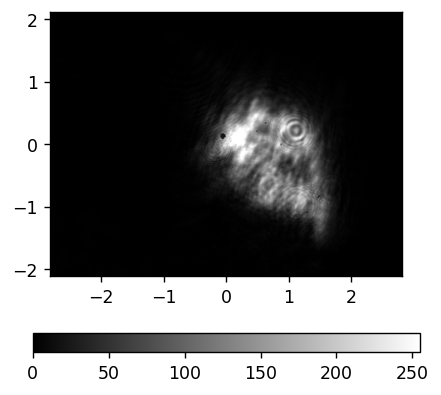

In [9]:
pol.Measure_Intensity(dim=2)

## Just in case of interest, define the region of interest (ROI)

If just want a determinated zone, select it

In [10]:
width = 100
height = 100
x0 = 1900
y0 = 1200
pol.camera.Set_ROI(width=width, height=height, x=x0, y=y0)

The value of the property resolution is [2560 1920].


Get the Background of the Roi

In [12]:
_ = pol.camera.Get_Image(is_background=True, stadistics=False)

The value of the property Resolution is [2560 1920].


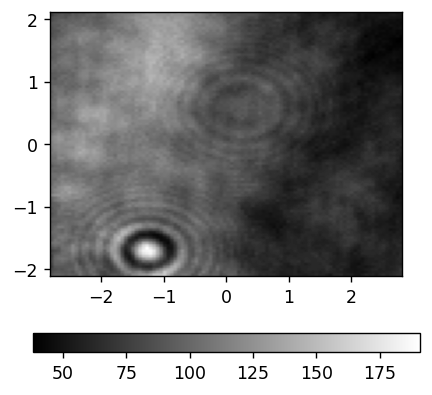

In [13]:
pol.Measure_Intensity(dim=2)

## Load Mueller Matrix

### Load the Mueller Matrix 0D

In [14]:
## Matriz Mueller del Espejo [0D]
%cd D:\Experimentos\Medidas_0D\Medidas_22_03_10
data = np.load("Test.Espejo_45_Degrees.npz")
M_Mirror_0D_Mueller = Mueller().from_components(data["Mcomp"])

M_Mirror_0D = (data["Mcomp"])

D:\Experimentos\Medidas_0D\Medidas_22_03_10


In [16]:
%cd D:\Experimentos\Medidas_2D

D:\Experimentos\Medidas_2D


## Power reference

The power reference is taken measuring the Mueller matrix of air (reflection=False) or a calibration mirror (reflection=True).

In [17]:
%cd D:\Experimentos\Medidas_2D\Pruebas 26_04_21

[WinError 2] El sistema no puede encontrar el archivo especificado: 'D:\\Experimentos\\Medidas_2D\\Pruebas 26_04_21'
D:\Experimentos\Medidas_2D


The matrix components of M / 23084.627750831663 are:
The mean value of param M00 is 0.09139581062799902 +- 0.011000659437679952
The mean value of param M01 is 0.04087972299057818 +- 0.00461089814185429
The mean value of param M02 is -0.03393122363221786 +- 0.009771849330195289
The mean value of param M03 is 0.050914417535857306 +- 0.009468256683150286
The mean value of param M10 is -0.028483910219390948 +- 0.006443080140031006
The mean value of param M11 is -0.06867652673572515 +- 0.010746808164712013
The mean value of param M12 is 0.002807884540191322 +- 0.00548071392607609
The mean value of param M13 is -0.034898016938246464 +- 0.005754907250233341
The mean value of param M20 is -0.055643531102381884 +- 0.015387771326472247
The mean value of param M21 is -0.03890555393138011 +- 0.006083331260839901
The mean value of param M22 is 0.06472641506709043 +- 0.017225647974088577
The mean value of param M23 is -0.052240308740814825 +- 0.01218637102785231
The mean value of param M30 is -0.055

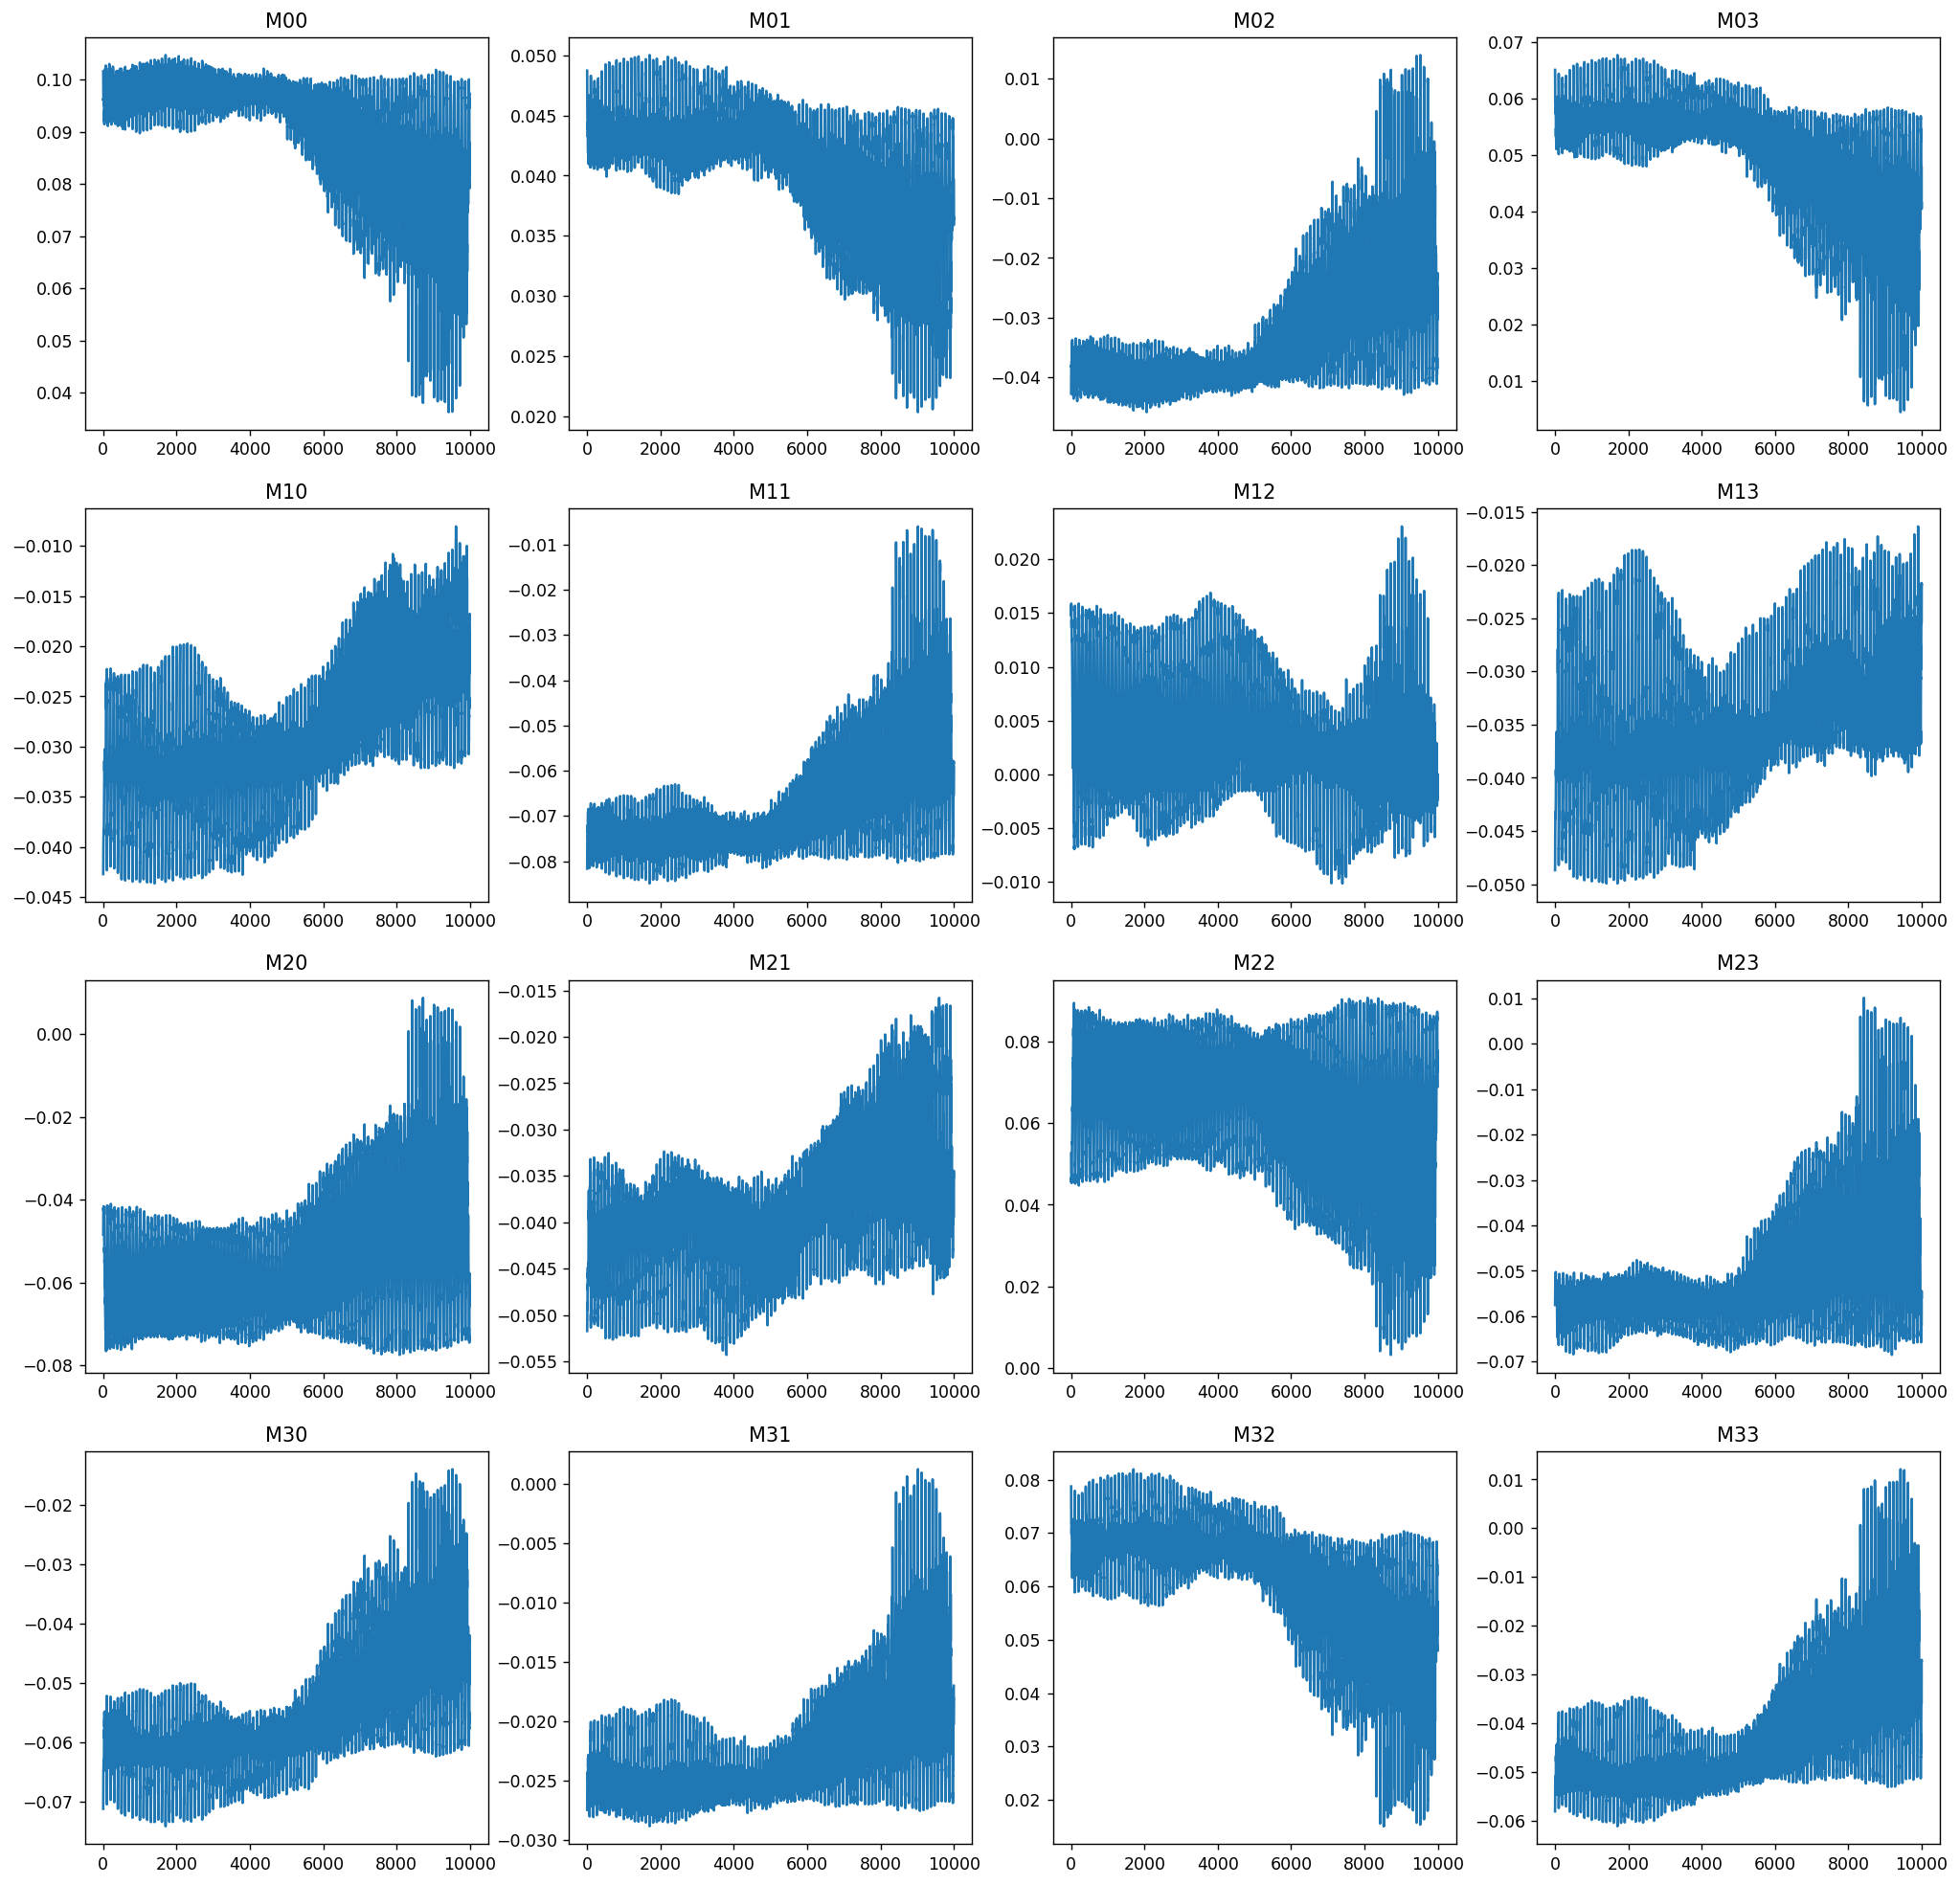

M / 23084.627750831663 M00 = [0.10158193 0.09929807 0.09858388 ... 0.07922723 0.08003076 0.08000021]
                       M01 = [0.04873029 0.04731254 0.04652917 ... 0.03587192 0.03611345 0.03648013]
                       M02 = [-0.04272241 -0.04076151 -0.0402212  ... -0.02252407 -0.02341864
 -0.0235303 ]
                       M03 = [0.06512392 0.06272274 0.06162757 ... 0.04048741 0.04121037 0.0415202 ]
                       M10 = [-0.04269797 -0.04152974 -0.04073032 ... -0.01677497 -0.01696939
 -0.01725372]
                       M11 = [-0.08163934 -0.07871593 -0.07743272 ... -0.05790741 -0.05815659
 -0.058245  ]
                       M12 = [ 0.01494711  0.01536197  0.01475094 ... -0.00209355 -0.00234006
 -0.00158431]
                       M13 = [-0.04867268 -0.04714193 -0.04622282 ... -0.0224654  -0.02175579
 -0.0218012 ]
                       M20 = [-0.04847747 -0.0457912  -0.04529238 ... -0.05779355 -0.05885477
 -0.05811478]
                       M21 = [-0.05170778 -0.0508

In [104]:
pol.Measure_Mueller_Matrix(dim=2,is_ref=True, reflection=True, N=20, filename="Test_Calibration_Mirror")

## Measure Mueller Matrix

Here we measure the Mueller matrix of any sample. Important input variables are:
* dim (int): Two Options; select 0 to measure with PHD, any other number for camera. Default: 0
* angles (str): Several options. Default: 'random'.
    * "random": Random angles.
    * 'linspace': Angles generated by linspace. N will be reduced to a number in the form of M^4 where M is an integer. 
* N (int): Number of measurements used. Default: 200.
* filter (bool): If True, the Mueller matrix is filtered to be physcally realizable. Default: True.
* reflection (bool): If True, polarimeter working on reflection, so the calibration data of the 50/50 beam splitter is used. Default: False.
* save_folder (str or None): If not None, it specifies the folder where the measurement will be saved. Default: None.
* filename (str or None): If not None, the filename where the measurement is stored. Default: None.
* verbose (bool): If True, the information is printed after performing the measurement. Default: True.

d:\software\py_pol\py_pol\mueller.py:1557: ComplexWarning: Casting complex values to real discards the imaginary part
  np.array(elem.parameters.trace(shape=False), dtype=float)


The matrix components of Inverse of M * M * Inverse of M are:
The mean value of param M00 is 0.2870673099150851 +- 0.02223491142451886
The mean value of param M01 is -0.02119922066420708 +- 0.06859801512000457
The mean value of param M02 is -0.08155639823486092 +- 0.03648796467025425
The mean value of param M03 is 0.05208227831357919 +- 0.025957805653378494
The mean value of param M10 is -0.11797930715032953 +- 0.03174570345662117
The mean value of param M11 is 0.05736330815012459 +- 0.08945081450557588
The mean value of param M12 is -0.004473919597767063 +- 0.04664386497786367
The mean value of param M13 is -0.12762691663122297 +- 0.029219700879261012
The mean value of param M20 is 0.09100163391670404 +- 0.08280880773195744
The mean value of param M21 is 0.11278632471745155 +- 0.10880432071644135
The mean value of param M22 is 0.07984899932463746 +- 0.04720130591675601
The mean value of param M23 is -0.10570415905857392 +- 0.03752279776838066
The mean value of param M30 is -0.04058767

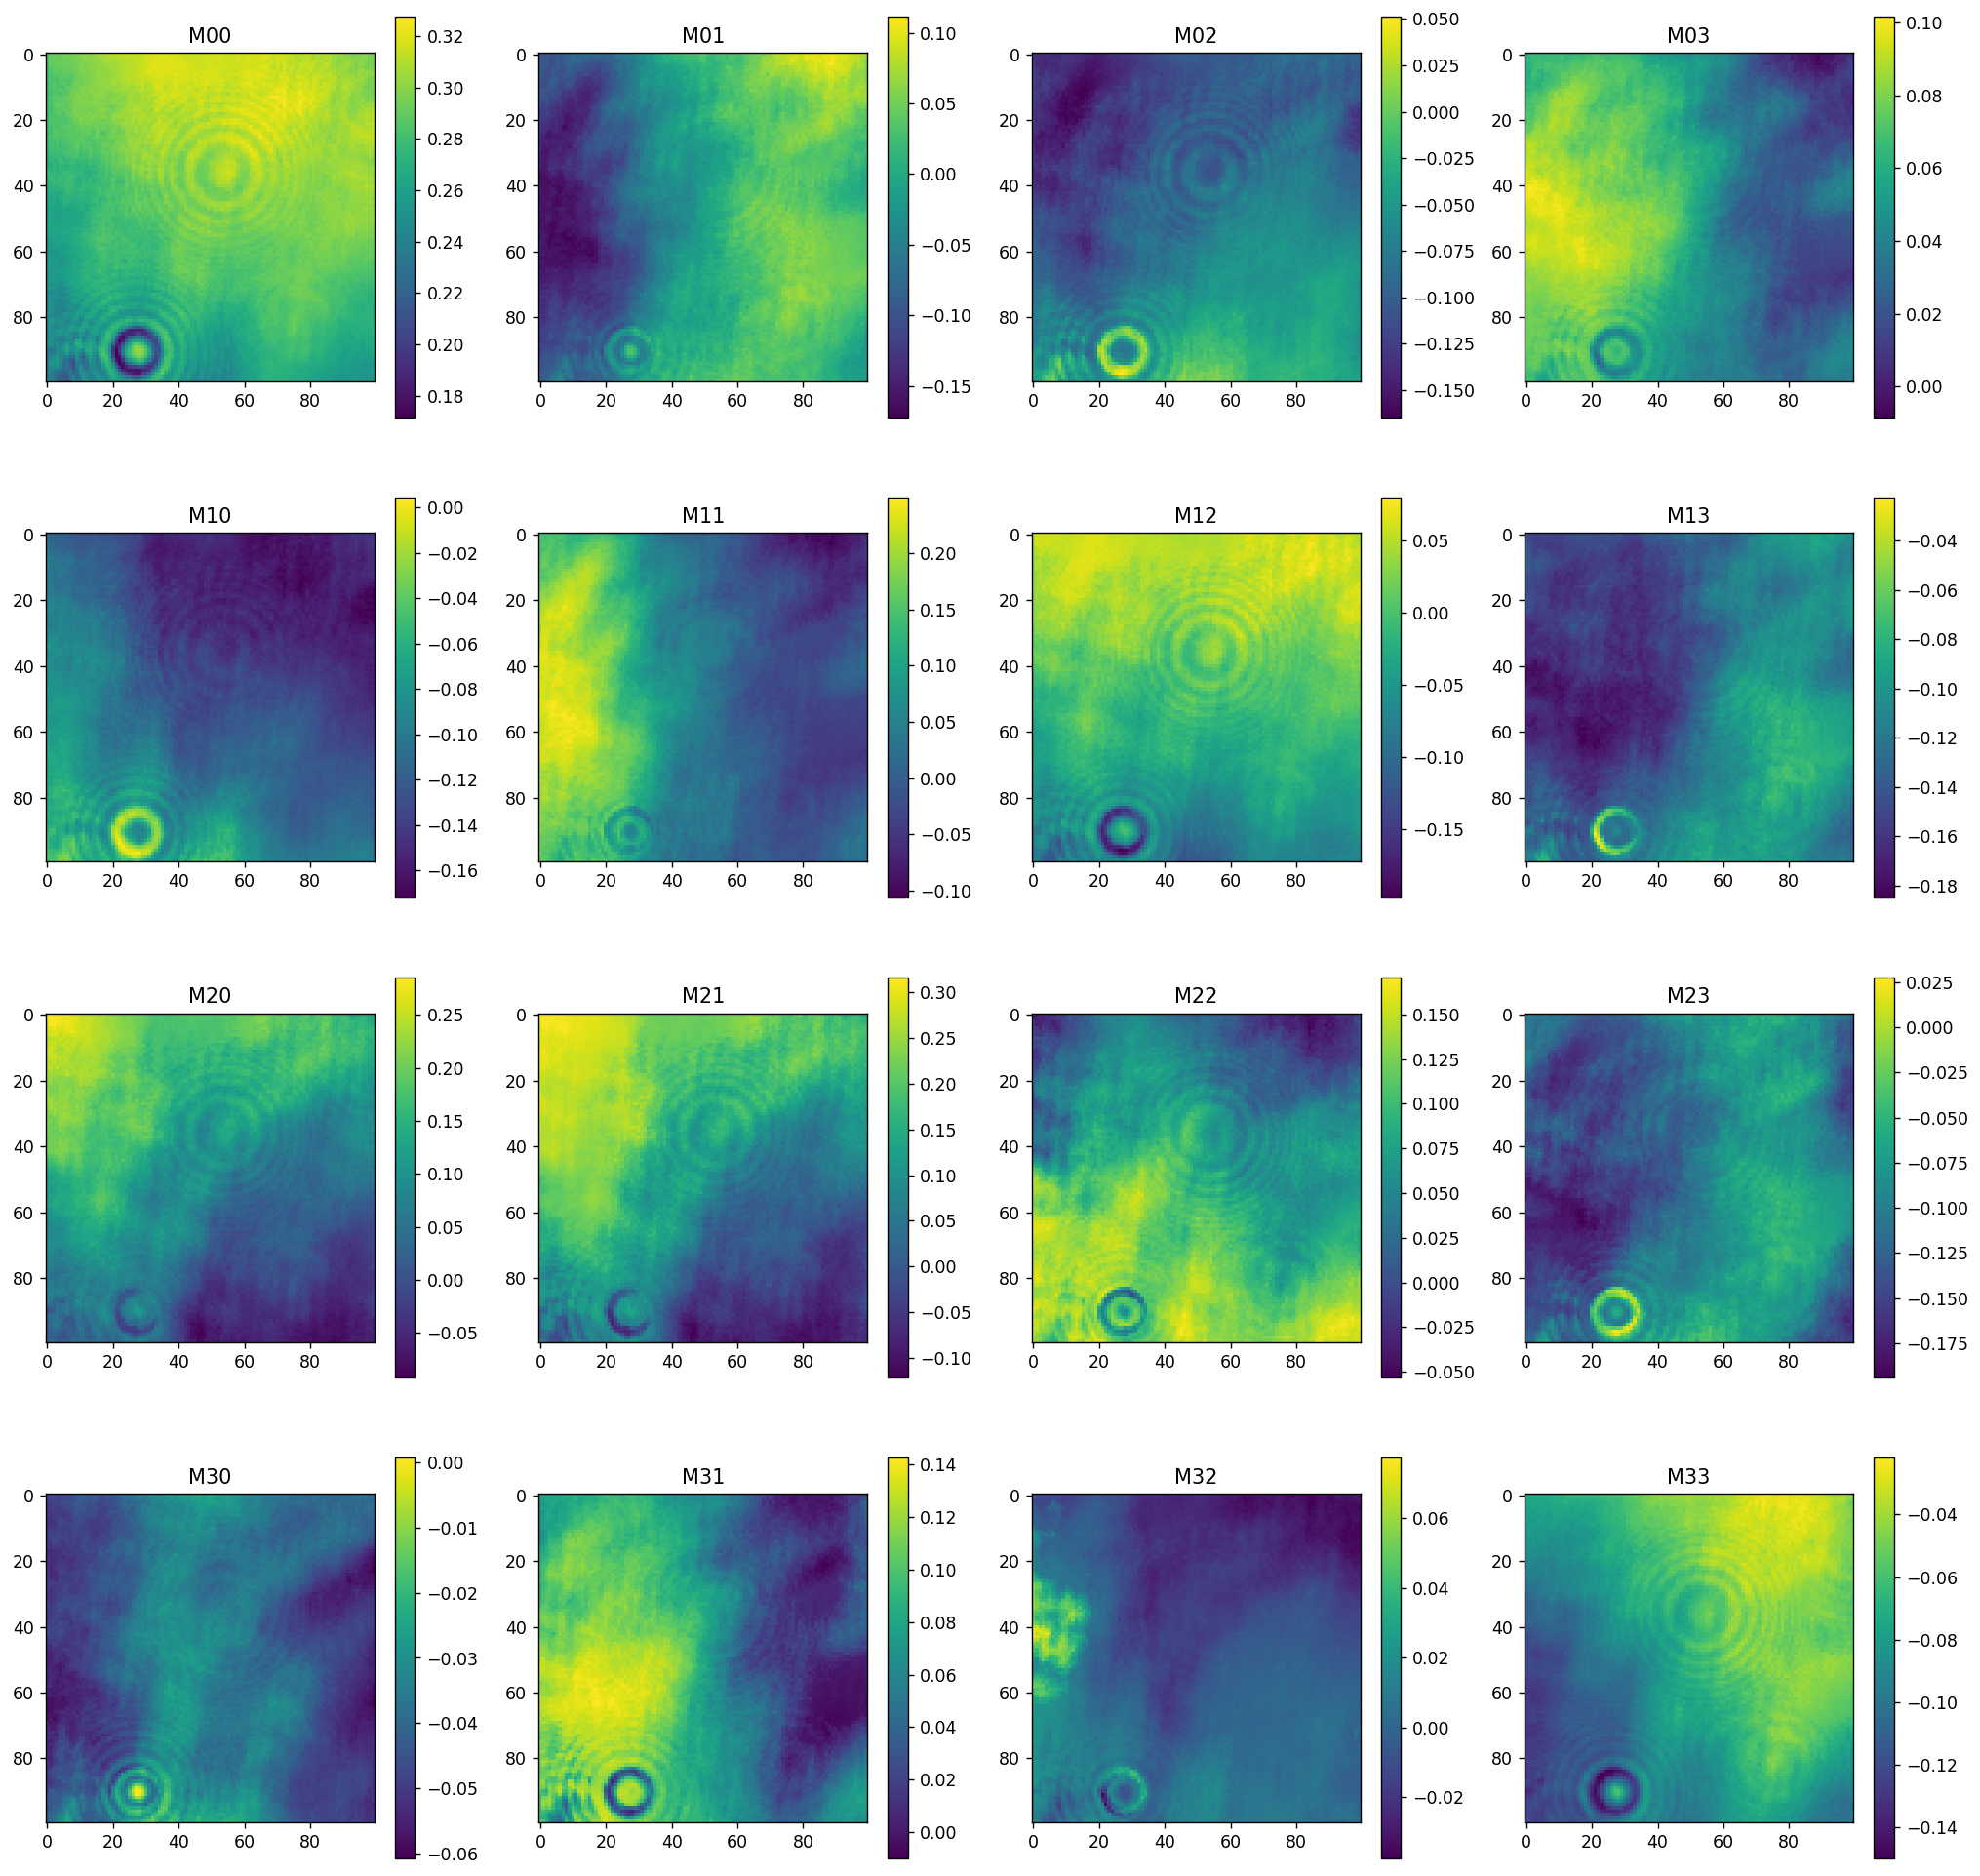

In [105]:
Msample = pol.Measure_Mueller_Matrix(dim=2,filename="Test.Espejo_45_Degrees.npz", reflection=True, N=20)

## Normalize Mueller Matrix

 ### Normalize with Iref the Mueller Matrix 2D

In [48]:

i = 0
j = 0

M_Mirror_2D_1 = np.zeros((16,100,100))

for i in range (16):
        M_Mirror_2D_1[i,:,:] = M_Mirror_2D[i,:,:]/I_Ref_Roi

 ### Normalize  Mean the Mueller Matrix 2D with Matrix 0D [0,0]

In [49]:
M_Mirror_Mean=np.zeros(16)

## Get the mean Value of each Matrix
i=0
for i in range(16):
    M_Mirror_Mean[i] = np.mean(M_Mirror_2D_1[i,:,:])
# M_Mirror_Mean = M_Mirror_Mean.reshape(4,4)
## Get the normalize value of each Matrix
M_Mirror_2D_2 = np.zeros((16,100,100))


i=0
for i in range(16):
    M_Mirror_2D_2[i,:,:] = M_Mirror_2D_1[i,:,:] *  M_Mirror_0D[0] / M_Mirror_Mean[0]
    M_Mirror_Mean[i]  = np.mean(M_Mirror_2D_2[i,:,:])

In [50]:
print( M_Mirror_0D.reshape(4,4),"\n\n")
print(M_Mirror_Mean)

[[ 0.54254066 -0.02217869 -0.04294267  0.00489328]
 [ 0.00820493  0.20793557 -0.47172643 -0.07543912]
 [ 0.00722393 -0.49062167 -0.20396739 -0.12863689]
 [-0.01535967  0.08765268  0.11212574 -0.52050061]] 


[ 5.42540661e-01  3.08443250e-05 -1.00796921e-03  5.66815984e-04
 -1.66163026e-03  3.48566815e-04 -5.64117364e-05 -1.58990990e-03
  1.02861647e-03  1.20849628e-03  9.93694200e-04 -1.30563212e-03
 -5.54369321e-04  7.18191879e-04 -8.33174195e-05 -8.96849839e-04]


In [8]:
pol.Close()